In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

### Ideas

I am not so sure percentage increase is what you want. Although this is in "thousands" a % increase from 2 --> 5 is greater than 1000 --> 1005
 - We need to get data on the total amount of people in the labor force
 
**Workflow Proposal**

$\frac{Occ_t}{LF_t}$ = % of people working in that industry out of the total labor force

 - $Occ_t$ = # of people employed in this industry at time $t$
 - $LF_t$ = # of people in the labor force at time $t$

Then, per 100k people --> % of people working in that industry * 100,000 (or * 100, it doesn't matter)

---

Which occupations have had the largest % increase over a certain time period?
 - Plot these top gainers 
 
Which occupations have had the largest % decrease over a certain time period?
 - Plot these top losers

Top occupations by % increase vs occupations by top % decrease
 - Plot these 

Filter occupations by wealth creation

In [152]:
fred = Fred(api_key = 'fb26df2e7851dcdd5267db1cd0abb74f')

In [153]:
lf = fred.get_series('CLF16OV')

In [154]:
lf = pd.DataFrame(lf)
lf = lf.rename(columns={0: 'LaborForce'})
lf.index.rename('Year', inplace=True)

In [155]:
labor = pd.read_csv('/Users/gabestechschulte/Downloads/labormarket.csv')
labor = labor.rename(columns={'Unnamed: 0': 'Year'})
labor['Year'] = pd.to_datetime(labor['Year'])
labor.set_index('Year', inplace=True)

In [156]:
labor = pd.merge(labor, lf, on='Year')
labor.tail()
yearly = labor.resample('A').last()
melt = yearly.reset_index().melt(id_vars = 'Year')

In [169]:
def plotter(df, occups=list):
    
    melt = df.reset_index().melt(id_vars = 'Year')
    
    sub = melt[melt.variable.isin(occups)]
    #plt.figure(figsize=(12, 9))
    #sns.lineplot('Year', 'value', data = sub, hue = 'variable')
    fig = px.line(sub, x="Year", y="value", color='variable',
                 width = 1250, height = 600)
    fig.show()

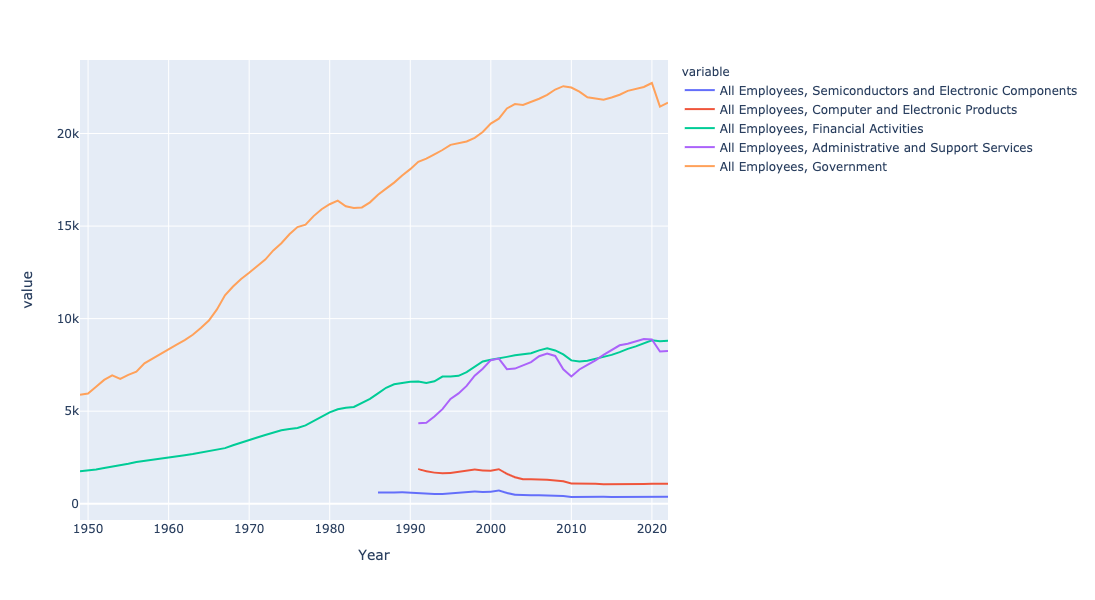

In [171]:
occs = ['All Employees, Financial Activities',
        'All Employees, Government',
        'All Employees, Administrative and Support Services',
        'All Employees, Computer and Electronic Products',
        'All Employees, Semiconductors and Electronic Components']

plotter(yearly, occs)

In [161]:
# As a proportion of the total civilian labor force
percents = yearly.apply(lambda x: x / yearly.LaborForce)

In [174]:
# Per 100,000 people in the labor force
# Since the underlying is "in thousands" it doesn't make a difference 
# whether it is *100,000 or *100
per100 = percents.apply(lambda x: x*100000)

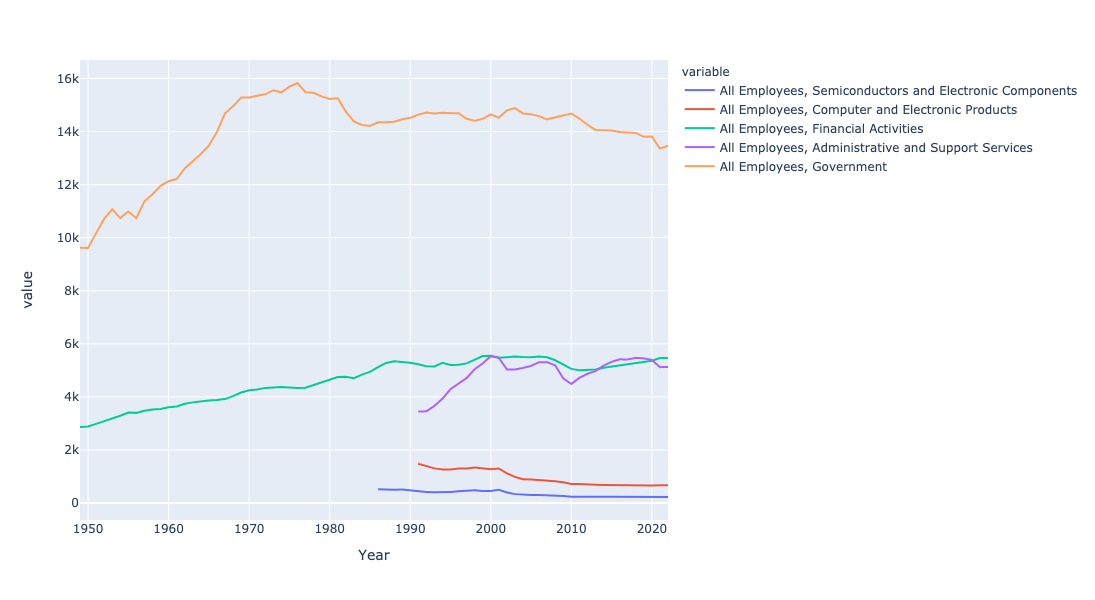

In [175]:
plotter(per100, occs)

In [ ]:
# Still in decimal format
percents100 = per100.pct_change()

In [177]:
percents100.describe()

,"All Employees, Total Nonfarm","All Employees, Total Private","All Employees, Goods-Producing","All Employees, Private Service-Providing","All Employees, Coal Mining","All Employees, Oil and Gas Extraction","All Employees, Mining and Logging","All Employees, Mining","All Employees, Logging","All Employees, Support Activities for Mining",...,"All Employees, Federal","All Employees, State Government","All Employees, Local Government","All Employees, Local Government Education","All Employees, State Government Education","All Employees, State Government, Excluding Education","All Employees, Federal, Except U.S. Postal Service","All Employees, U.S. Postal Service","All Employees, Local Government, Excluding Education",LaborForce
count,73.000000,73.000000,73.000000,73.000000,36.000000,49.000000,73.000000,63.000000,73.000000,31.000000,...,73.000000,66.000000,66.000000,66.000000,66.000000,66.000000,73.000000,73.000000,66.000000,73.0
mean,0.002947,0.002696,-0.010374,0.008202,-0.043898,-0.010212,-0.017470,-0.013685,-0.019493,0.010014,...,-0.007991,0.008666,0.006886,0.008500,0.017683,0.003684,-0.006680,-0.015357,0.005255,0.0
std,0.019455,0.021827,0.037343,0.015401,0.066692,0.068777,0.072043,0.082757,0.072103,0.132898,...,0.033177,0.022903,0.019644,0.023516,0.038329,0.019287,0.043247,0.037695,0.018816,0.0
min,-0.045069,-0.051668,-0.115667,-0.044316,-0.190506,-0.194311,-0.198908,-0.220133,-0.203161,-0.282292,...,-0.107824,-0.038771,-0.044794,-0.063296,-0.100426,-0.028641,-0.100296,-0.134839,-0.064522,0.0
25%,-0.009119,-0.009154,-0.030750,-0.000896,-0.091448,-0.048487,-0.054399,-0.062334,-0.056433,-0.079356,...,-0.023254,-0.006091,-0.003131,-0.003403,-0.003708,-0.008138,-0.029701,-0.033973,-0.003515,0.0
50%,0.004456,0.006977,-0.003284,0.010246,-0.056784,-0.019998,-0.013921,-0.011426,-0.022943,0.046501,...,-0.012052,0.004581,0.006556,0.005049,0.010365,0.001663,-0.011093,-0.015183,0.003539,0.0
75%,0.014797,0.017145,0.013770,0.019814,-0.000488,0.033066,0.020447,0.028881,0.016469,0.102943,...,0.002096,0.016444,0.014492,0.017822,0.036012,0.013280,0.004112,0.010259,0.014110,0.0
max,0.073944,0.076457,0.124491,0.039976,0.112548,0.151992,0.252149,0.281812,0.227597,0.214006,...,0.148963,0.084689,0.076285,0.081641,0.123535,0.081287,0.186463,0.075580,0.071060,0.0


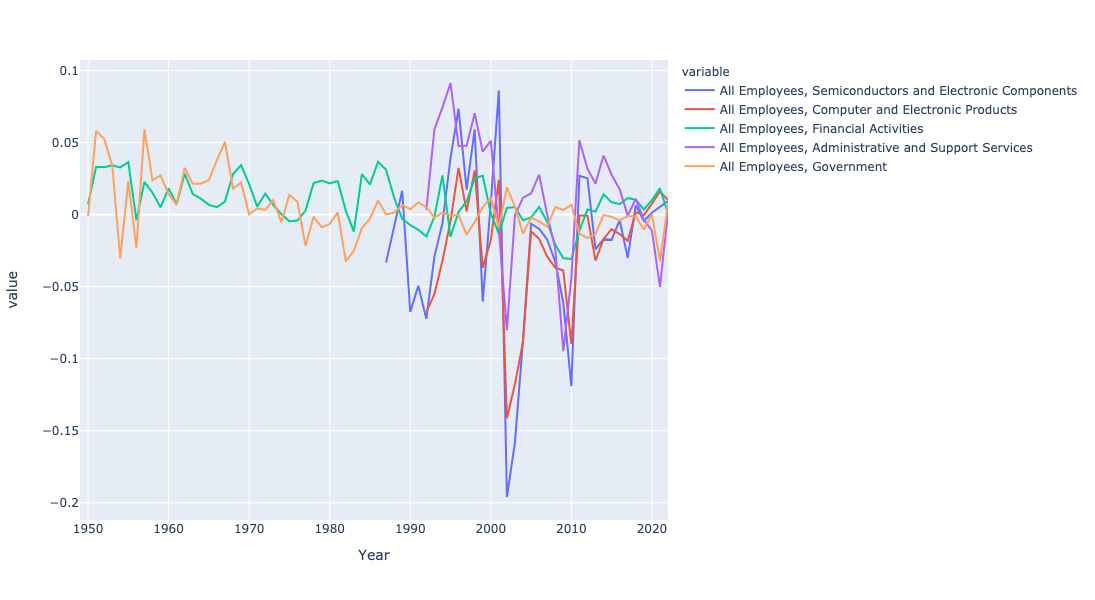

In [178]:
plotter(percents100, occs)

In [24]:
for col in labor.columns:
    print(col)

All Employees, Total Nonfarm
All Employees, Total Private
All Employees, Goods-Producing
All Employees, Private Service-Providing
All Employees, Coal Mining
All Employees, Oil and Gas Extraction
All Employees, Mining and Logging
All Employees, Mining
All Employees, Logging
All Employees, Support Activities for Mining
All Employees, Mining, Except Oil and Gas
All Employees, Construction
All Employees, Residential Building
All Employees, Nonresidential Building
All Employees, Heavy and Civil Engineering Construction
All Employees, Residential Specialty Trade Contractors
All Employees, Nonresidential Specialty Trade Contractors
All Employees, Specialty Trade Contractors
All Employees, Construction of Buildings
All Employees, Manufacturing
All Employees, Durable Goods
All Employees, Motor Vehicles and Parts
All Employees, Wood Products
All Employees, Semiconductors and Electronic Components
All Employees, Computer and Electronic Products
All Employees, Primary Metals
All Employees, Transpo